In [ ]:
# MBA DATA SCIENCE & ANALYTICS USP/Esalq
#Supervised ML - SIMPLE AND MULTIPLE REGRESSION ANALYSIS
#Isabela Pereira Lima Dias

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [4]:
#dataset
df = pd.read_csv("timedistance.csv", delimiter= ",")
df.rename(columns = {'tempo':'time', 'distancia':'distance'}, inplace = True)
df

,time,distance
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [5]:
# features of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   time      10 non-null     int64
 1   distance  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [6]:
#Statistics
df.describe()

,time,distance
count,10.00000,10.000000
mean,30.00000,17.000000
std,14.90712,9.510228
min,10.00000,5.000000
25%,20.00000,8.750000
50%,27.50000,17.500000
75%,38.75000,23.750000
max,55.00000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

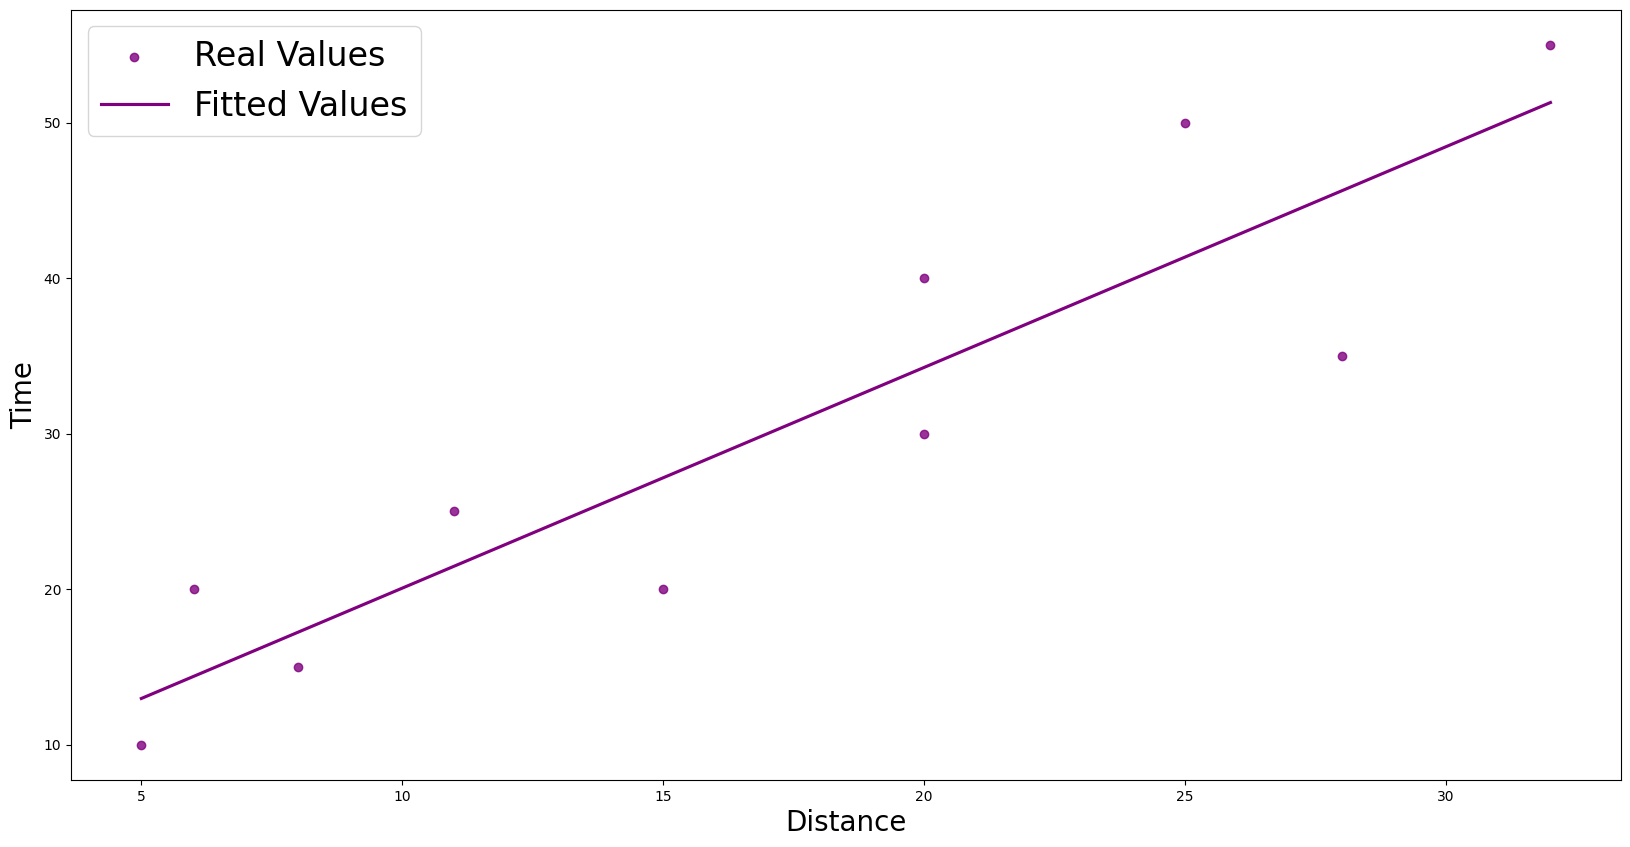

In [7]:
#linear regression model using sns.regplot
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distance', y='time', ci=False, color='purple')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(['Real Values', 'Fitted Values'], fontsize=24)
plt.show

In [8]:
# Our linear model -  Ordinary least squares (OLS) method
model = sm.OLS.from_formula("time ~ distance", data= df).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     36.30
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           0.000314
Time:                        09:18:31   Log-Likelihood:                -32.123
No. Observations:                  10   AIC:                             68.25
Df Residuals:                       8   BIC:                             68.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784      4.532      1.297      0.231      -4.573      16.330
distance       1.4189      0.235      6.025      0.000       0.876       1.962
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.694
Skew:                          -0.262   Prob(JB):                        0.707
Kurtosis:                       1.820   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Now, the fitted values yhat and the residuals (errors)
df["yhat"] = model.fittedvalues
df["error"] = model.resid

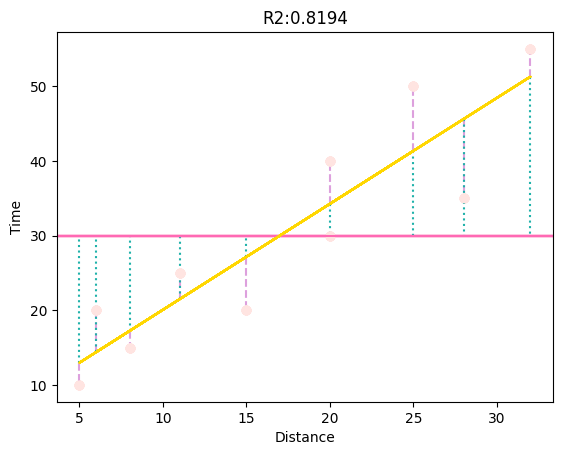

In [16]:
# R2 - Coefficient of Model Adjustment
y = df['time']
yhat = df['yhat']
x = df['distance']
mean = np.full(x.shape[0],y.mean(), dtype= int )
for i in range (len(x)-1):
  plt.plot([x[i],x[i]],[yhat[i], y[i]], "--", color="plum")
  plt.plot([x[i],x[i]],[yhat[i], mean[i]], ":", color="lightseagreen")
  plt.plot(x,y, 'o', color = "mistyrose")
  plt.axhline(y = y.mean(), color = "hotpink", linestyle="-")
  plt.plot(x,yhat, color = "gold")
  plt.title("R2:" + str(round(model.rsquared,4)))
  plt.xlabel("Distance")
  plt.ylabel("Time")
plt.show()


In [18]:
#Pearson correlation
df[["time", "distance"]].corr()
#R2
(df[["time", "distance"]].corr())**2

,time,distance
time,1.000000,0.819426
distance,0.819426,1.000000


In [19]:
# Model with perfect fit
auxiliar_model = sm.OLS.from_formula("yhat ~ distance", data= df).fit()
auxiliar_model.summary() #Note R-squared -> 1.000

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yhat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.598e+31
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.72e-122
Time:                        09:39:22   Log-Likelihood:                 309.16
No. Observations:                  10   AIC:                            -614.3
Df Residuals:                       8   BIC:                            -613.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8784   6.83e-15   8.61e+14      0.000       5.878       5.878
distance       1.4189   3.55e-16      4e+15      0.000       1.419       1.419
==============================================================================
Omnibus:                       13.263   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                1.667
Skew:                           0.000   Prob(JB):                        0.435
Kurtosis:                       1.000   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

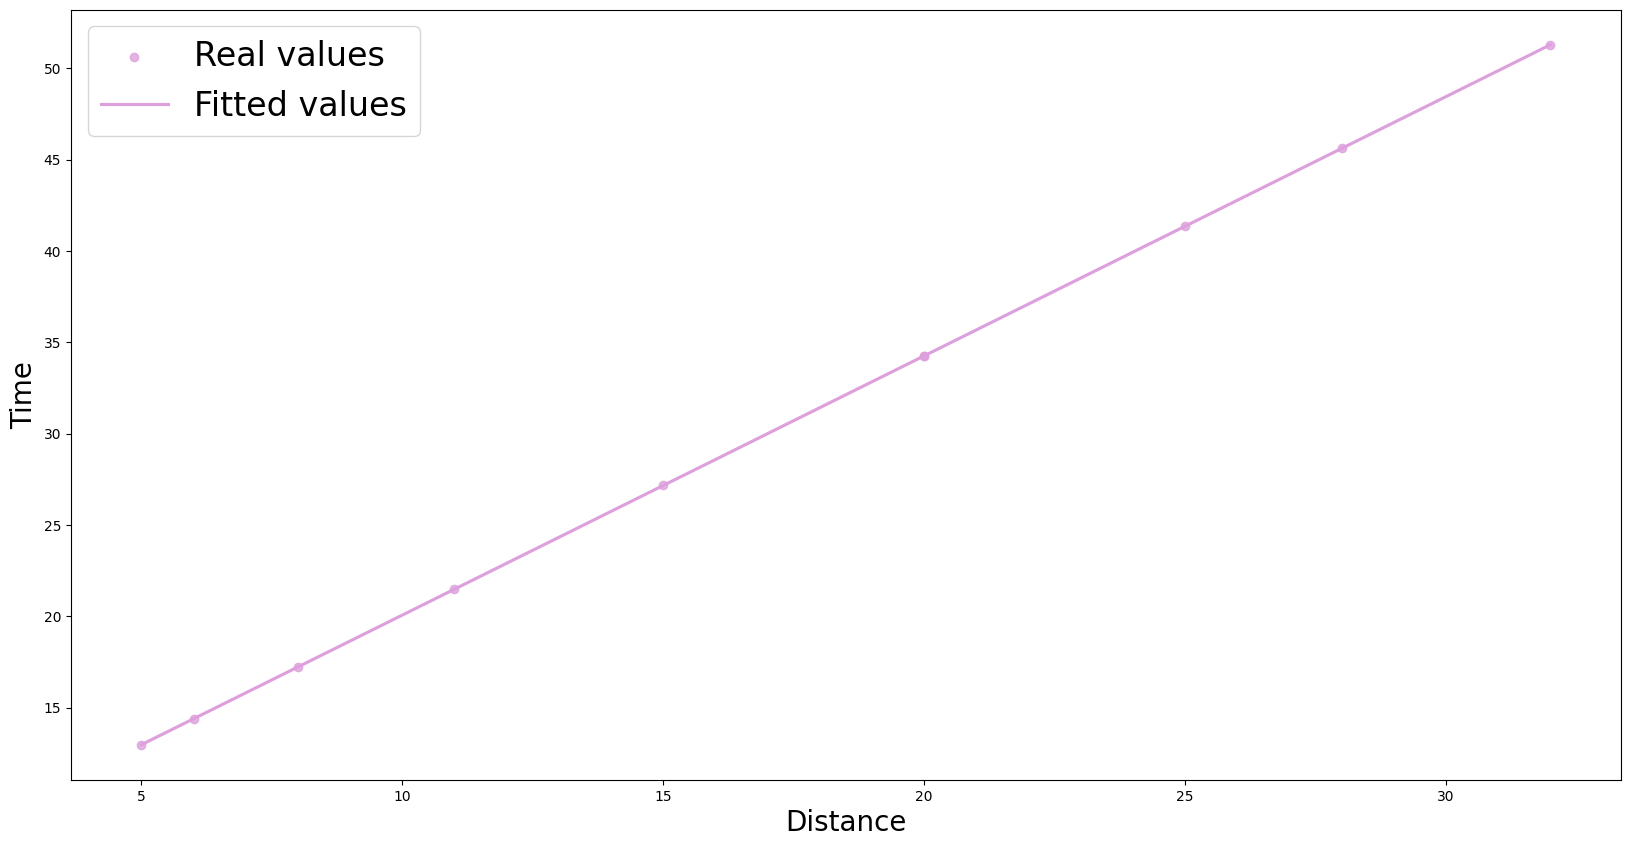

In [21]:
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distance', y='yhat', ci=False, color='plum')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(['Real values', 'Fitted values'], fontsize=24)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

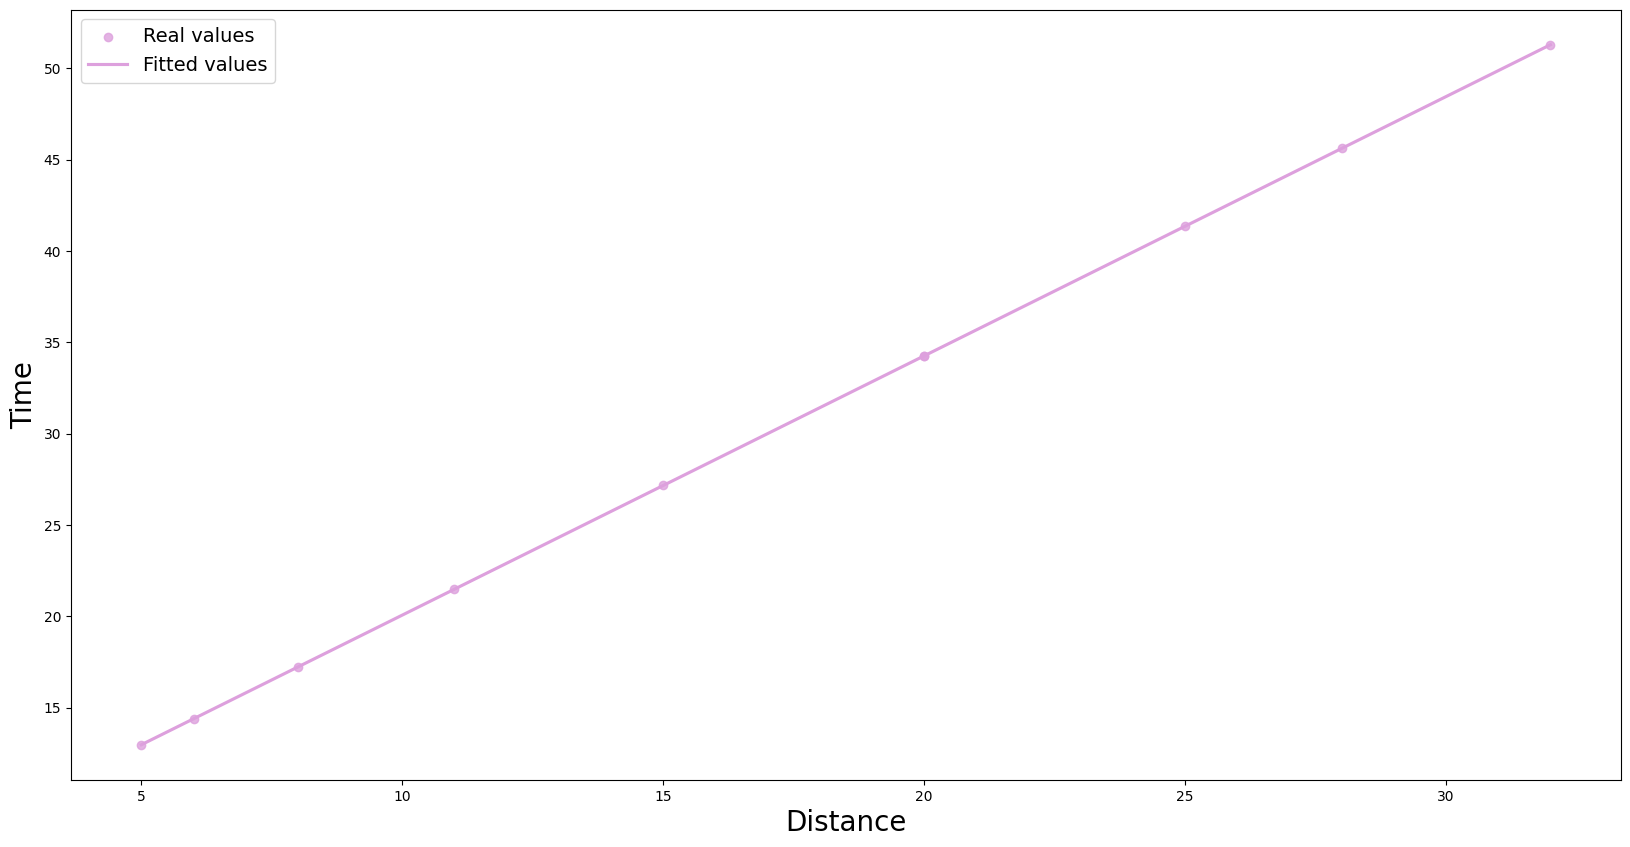

In [22]:
# For a confidence interval of 95%, we set the ci parameter
plt.figure(figsize=(20,10))
sns.regplot(data=df, x='distance', y='yhat', ci=95, color='plum')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(['Real values', 'Fitted values'], fontsize=14)
plt.show

In [24]:
#Now, we can evaluate the confidence interval, which is determined in terms of alpha (significance interval),
# significance level 10% - confidence level 90%
model.conf_int(alpha=0.1)
# significance level 5% - confidence level 95%
model.conf_int(alpha=0.05)


,0,1
Intercept,-4.573188,16.329944
distance,0.875861,1.961977


In [26]:
# Our purpose is to make predictions.
# Time to cover the distance of 25 km ?
model.predict(pd.DataFrame({'distance':[25]}))

0    41.351351
dtype: float64

In [28]:
# we can reply the data in order to get more data
repli_df = pd.DataFrame(np.repeat(df.values, 3, axis=0))
repli_df.columns = df.columns
repli_model = sm.OLS.from_formula("time ~ distance",  repli_df).fit()

In [29]:
# significance level 5% - confidence level 95%
repli_model.conf_int(alpha=0.05)

,0,1
Intercept,0.915844,10.840913
distance,1.161068,1.676769


<function matplotlib.pyplot.show(close=None, block=None)>

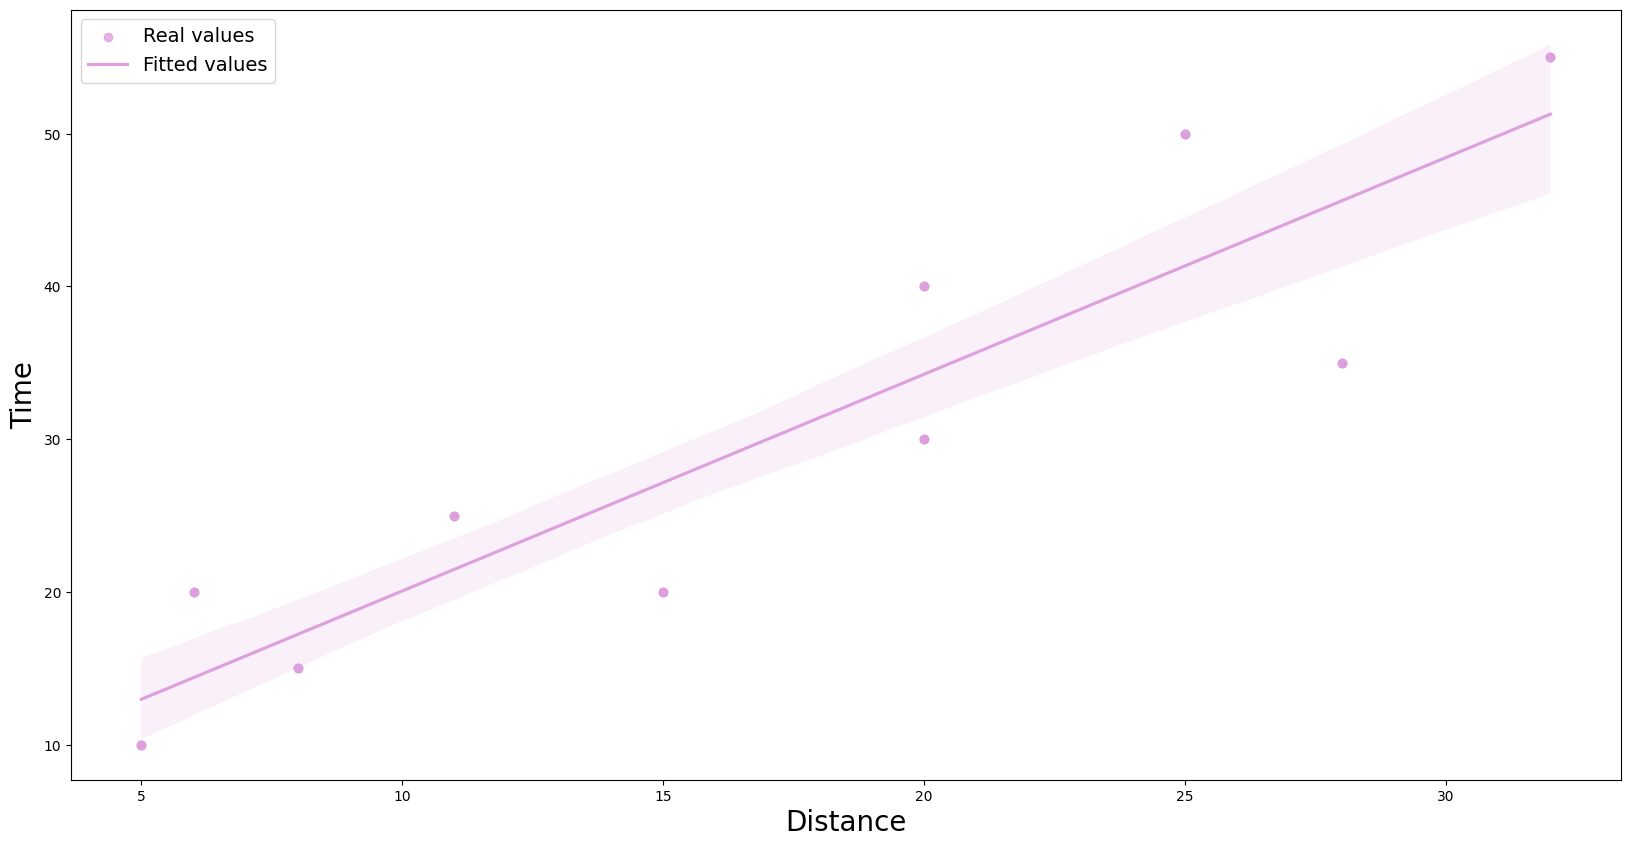

In [30]:
# For a confidence interval of 95%, we set the ci parameter
plt.figure(figsize=(20,10))
sns.regplot(data=repli_df, x='distance', y='time', ci=95, color='plum')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(['Real values', 'Fitted values'], fontsize=14)
plt.show